In [2]:
import os

# from google.colab import drive
# drive.mount('/content/drive/')
# os.chdir('/content/drive/MyDrive/Times-Series-Library/')

os.chdir('..')
os.getcwd()

'C:\\Users\\BubbleTea\\Desktop\\Energy Forcasting\\Time-Series-Library'

In [ ]:
!pip install -r requirements.txt

In [2]:
trials = os.listdir('./results')
print(*trials, sep='\n')

model_ID1_run_000@iter0
model_new_model_run_new_run_1@iter0
model_ID1_run_003@iter0


In [16]:
import numpy as np
import pandas as pd
import plotly.express as px

In [23]:
save_dir = 'results/' + trials[2] + '/test'
result_df = pd.read_csv(f'{save_dir}/result_df.csv', index_col=0)
result_df.index = pd.to_datetime(result_df.index)


# Plotting single test result

In [24]:
def plot(df, title=None, save=False):
    fig = px.line(df, template='plotly_white')
    fig.update_yaxes(title_text='')
    fig.update_xaxes(title_text='')
    fig.update_layout(hovermode='x unified',
                      title_text=title, title_x=.5,
                      legend=dict(orientation="h", title_text=''))
    if save:
        fig.write_image(f"{save_dir}/{title}.png")
    return fig


## 1. Result

In [26]:
plot(result_df, title='result')

Output hidden; open in https://colab.research.google.com to view.

## 2. Clipped Result

In [33]:
clipped_df = result_df.copy(deep=True)

after = clipped_df.loc['2020-03-01':, :]
clipped_df.loc[:, 'prediction'] = np.clip(clipped_df.prediction.values, after.target.min(), after.target.max())

plot(clipped_df, title='clipped result')


Output hidden; open in https://colab.research.google.com to view.

## 3. Error

In [28]:
error_df = pd.concat([result_df.iloc[:, 1] - result_df.iloc[:, 0],
                      clipped_df.iloc[:, 1] - clipped_df.iloc[:, 0]],
                     axis='columns').dropna()
error_df.columns = ['min-level output', '30 mins averange output']
plot(error_df, title='error')

Output hidden; open in https://colab.research.google.com to view.

## 4. Error Percentage

In [29]:
error_pct_df = error_df.copy(deep=True)
error_pct_df.iloc[:, 0] = error_pct_df.iloc[:, 0].values / result_df.dropna().target.values
error_pct_df.iloc[:, 1] = error_pct_df.iloc[:, 0].values / result_df.dropna().target.values
fig = plot(error_pct_df, title='error percentage')
fig.update_yaxes(tickformat='.0%')

Output hidden; open in https://colab.research.google.com to view.

## 5. 30 minutes average result

In [30]:
plot(result_df.resample('30min').mean(), title='30 mins average result')

Output hidden; open in https://colab.research.google.com to view.

## 6. Clipped 30 minutes average result

In [34]:
plot(clipped_df.resample('30min').mean(), title='clipped 30 mins average result')

Output hidden; open in https://colab.research.google.com to view.

# Compare training result of different data sources

Experiment result of different data sources with controlled hyperparameters, shown that training on temperature data from **B** tends to have the best performance in terms of validation loss, and the highest convergence speed.

In [27]:
df_all = pd.read_csv('results/data_source_comparison.csv', index_col=0)

In [28]:
df_all

,B_test,B_val,A_test,A_val,C_test,C_val,ALL_test,ALL_val
1.0,0.177556,0.241807,0.203326,0.264739,0.183800,0.254059,0.209850,0.282258
2.0,0.152600,0.206964,0.172851,0.228939,0.153034,0.207090,0.174708,0.236972
3.0,0.129383,0.172602,0.159063,0.209630,0.136998,0.185693,0.154356,0.210225
4.0,0.118556,0.157593,0.146948,0.189490,0.130483,0.172231,0.148436,0.192641
5.0,0.119202,0.150277,0.147840,0.183864,0.130616,0.162909,0.132244,0.186499
6.0,0.117560,0.137300,0.146786,0.179159,0.122362,0.149551,0.127589,0.173866
7.0,0.127906,0.143258,0.152071,0.181295,0.129965,0.153509,0.129031,0.163538
8.0,0.120878,0.129887,0.149062,0.175356,0.125626,0.145650,0.120931,0.152145
9.0,0.130746,0.148293,0.155551,0.187325,0.134264,0.157203,0.124468,0.154764
10.0,0.117436,0.129087,0.152522,0.181295,0.129833,0.155325,0.121716,0.146872


<Axes: title={'center': 'test loss / epoch'}>

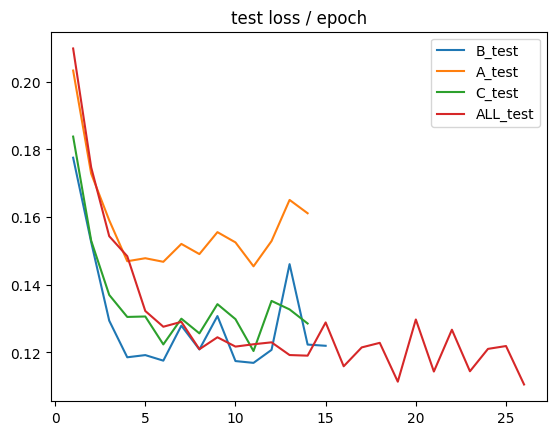

In [34]:
df_all.loc[:, [x for x in df_all.columns if 'test' in x]].plot(title='test loss / epoch')

<Axes: title={'center': 'validation loss / epoch'}>

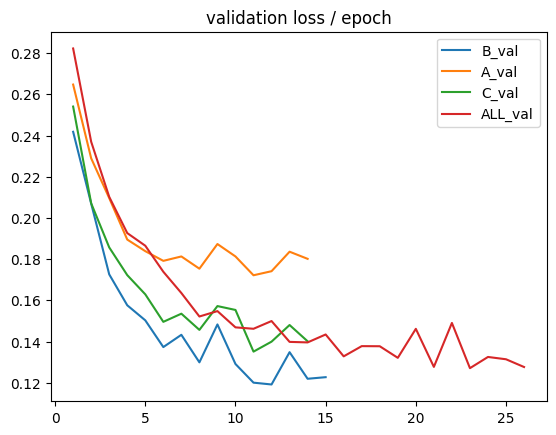

In [30]:
df_all.loc[:, [x for x in df_all.columns if 'val' in x]].plot(title='validation loss / epoch')